# Examination of spirals with only one arm

We notice a surprising number of galaxies for which only one arm has been identified. This notebook examines the reasons behind observation.

We find that 3 galaxies in the sample are truly one-armed spirals, while in the remaining 35 galaxies for which only one arm was identified, the other arms were simply not recovered during clustering due to noise in the dataset.

This finding suggests that the galaxy builder dataset should not be used to investigate how trends related to spiral arm count. However, as our hierarchical model incorporates the uncertainty involved with missing spiral arms, the results related to pitch angle should not be unduly affected.

In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from astropy.visualization import AsinhStretch

In [22]:
stretch = AsinhStretch()

Start off by loading in the spiral arm data and the galaxy data for plotting

In [26]:
merged_arms = pd.read_pickle('lib/merged_arms.pickle')
merged_arms.head()

,pipeline,arm_0,arm_1,arm_2,arm_3,0,1,2,3
20902077,<gzbuilder_analysis.aggregation.spirals.oo.__p...,<gzbuilder_analysis.aggregation.spirals.oo.__a...,<gzbuilder_analysis.aggregation.spirals.oo.__a...,NaN,NaN,NaN,NaN,NaN,NaN
20902054,<gzbuilder_analysis.aggregation.spirals.oo.__p...,<gzbuilder_analysis.aggregation.spirals.oo.__a...,<gzbuilder_analysis.aggregation.spirals.oo.__a...,NaN,NaN,NaN,NaN,NaN,NaN
20902008,<gzbuilder_analysis.aggregation.spirals.oo.__p...,<gzbuilder_analysis.aggregation.spirals.oo.__a...,<gzbuilder_analysis.aggregation.spirals.oo.__a...,<gzbuilder_analysis.aggregation.spirals.oo.__a...,NaN,NaN,NaN,NaN,NaN
20901998,<gzbuilder_analysis.aggregation.spirals.oo.__p...,<gzbuilder_analysis.aggregation.spirals.oo.__a...,<gzbuilder_analysis.aggregation.spirals.oo.__a...,<gzbuilder_analysis.aggregation.spirals.oo.__a...,NaN,NaN,NaN,NaN,NaN
20902001,<gzbuilder_analysis.aggregation.spirals.oo.__p...,<gzbuilder_analysis.aggregation.spirals.oo.__a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
fm = pd.read_pickle('lib/fitting_metadata.pkl')

Identify the number of arms in each row:

In [3]:
n_arms = merged_arms.drop('pipeline', axis=1).apply(lambda row: len(row.dropna()), axis=1)

We now extract all the galaxies for which only one spiral arm was identified.

In [12]:
candidate_one_armed_spirals = merged_arms[n_arms.eq(1)]
n_candidates = len(candidate_one_armed_spirals)

Let's quickly plot these galaxies - it's immediately obvious that many of them are in fact multi-armed spirals

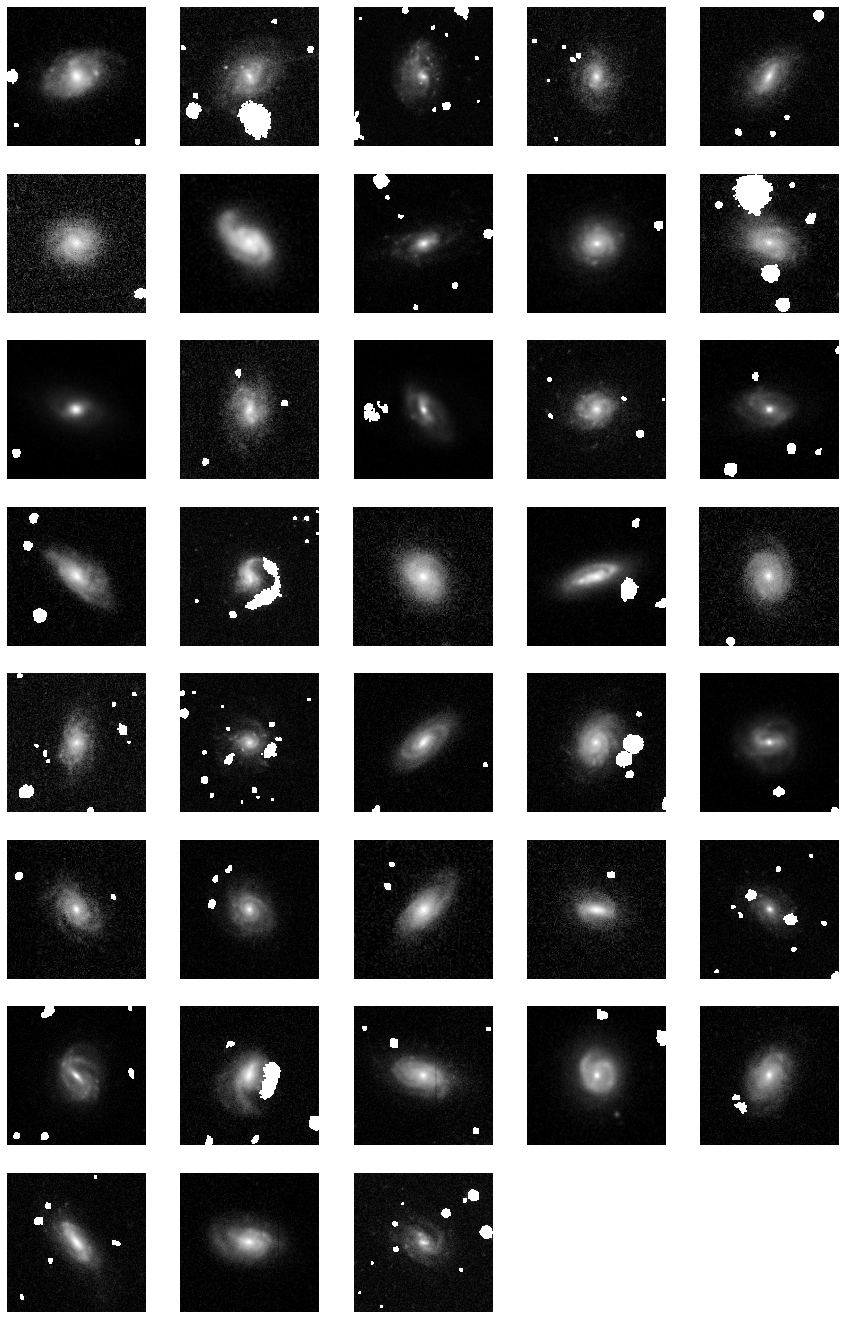

In [25]:
nrows = n_candidates // 5 + int(n_candidates % 5 > 0)
f, ax = plt.subplots(ncols=5, nrows=nrows, figsize=(5*3, nrows*3))
ax = ax.ravel()
for i, (subject_id, row) in enumerate(candidate_one_armed_spirals.iterrows()):
    ax[i].imshow(stretch(fm.galaxy_data.loc[subject_id]), cmap='gray')
[a.axis('off') for a in ax];

A quick (subjective) tally of these 38 galaxies suggests only 3 are truly one-armed, and for the remaining 35 it is that we failed to cluster drawn arms (due to poor agreement between volunteers, or noise in the drawn arms).

Let's take an example and plot the drawn arms over it, to 

(-0.5, 283.5, 283.5, -0.5)

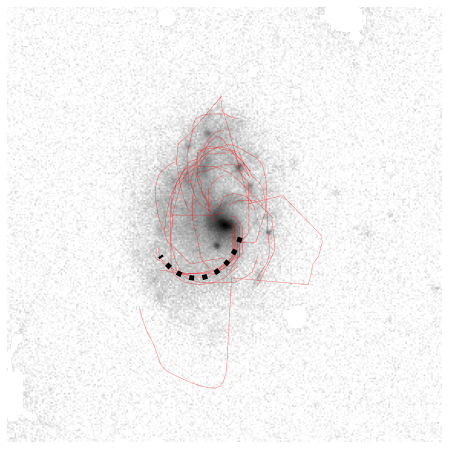

In [55]:
example_gal = candidate_one_armed_spirals.sample(1, random_state=1).squeeze().dropna()

plt.figure(figsize=(8, 8))
plt.imshow(stretch(fm.galaxy_data.loc[example_gal.name]), cmap='gray_r')
for arm in example_gal.pipeline.drawn_arms:
    plt.plot(*arm.T, 'r-', lw=0.5, alpha=0.5)
    
for _, arm in example_gal.drop('pipeline').iteritems():
    plt.plot(*arm.reprojected_log_spiral.T, 'k:', lw=5)
plt.axis('off')

We can see that while other arms may be present, there is not enough consensus from the volunteers to successfully cluster a second arm.

Other examples are less clear-cut, but the same notion exists: we can only do as well as the data we have!

(-0.5, 144.5, 144.5, -0.5)

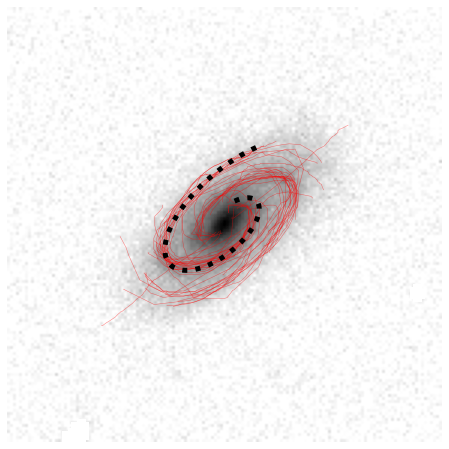

In [59]:
example_gal = candidate_one_armed_spirals.sample(1, random_state=0).squeeze().dropna()

plt.figure(figsize=(8, 8))
plt.imshow(stretch(fm.galaxy_data.loc[example_gal.name]), cmap='gray_r')
for arm in example_gal.pipeline.drawn_arms:
    plt.plot(*arm.T, 'r-', lw=0.5, alpha=0.5)
    
for _, arm in example_gal.drop('pipeline').iteritems():
    plt.plot(*arm.reprojected_log_spiral.T, 'k:', lw=5)
plt.axis('off')

Here, we suspect we *should* have been able to recover a second arm, but due to the trade-off between false positives and negatives when selecting clustering hyper-parameters, it was decided that erring on the side of caution and missing arms would allow a more robust, cautious analysis than including many erroneous clusters.